<a href="https://colab.research.google.com/github/juanpaat/Global-Food-Insecurity/blob/main/ML%20for%20food%20insecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [ ]:
# load the data
url_data = '/content/drive/MyDrive/Colab Notebooks/AI to predict famine/data/Hotspots (Countries requiring external assistance for food).csv'
raw_data = pd.read_csv(url_data, encoding='utf_8')
raw_data.head()

,Date,ISO3,Country,Nature of Food Insecurity,Main Reasons
0,2009-04,AFG,Afghanistan,Widespread lack of access,"Conflict and insecurity, inadequate rainfall"
1,2009-04,BDI,Burundi,Severe localized food insecurity,"Civil strife, IDPs and returnees"
2,2009-04,BGD,Bangladesh,Severe localized food insecurity,Past floods and cyclone
3,2009-04,CAF,Central African Republic,Severe localized food insecurity,"Refugees, insecurity in parts"
4,2009-04,CIV,C�te d'Ivoire,Severe localized food insecurity,Conflict related damage


In [ ]:
# load the data
url_features = '/content/drive/MyDrive/Colab Notebooks/AI to predict famine/data/mydata_imputed.csv'
features = pd.read_csv(url_features, encoding='utf_8')
features.head()

,country,year,Food loss,Road infrastructure,Forest change,Flooding,Armed conflict,Land degradation,Access to drinking water,Human development index
0,Afghanistan,2012,3.1950,2,-0.0700,2.3875,2,12.0,69.8,0.44900
1,Afghanistan,2013,3.6200,1,-1.1900,7.7500,0,17.0,94.6,0.45900
2,Afghanistan,2014,10.3450,0,-0.8800,1.8075,1,24.5,63.2,0.46900
3,Afghanistan,2015,7.7675,1,0.5625,5.0250,1,23.0,79.4,0.47900
4,Afghanistan,2016,5.1900,2,2.0050,8.2425,1,21.5,95.6,0.48225


In [ ]:
# Replace names
raw_data['Country'].replace('Democratic Republic of the Congo', 'Congo (Dem. Rep.)', inplace=True)
raw_data['Country'].replace("C�te d'Ivoire", "Côte d'Ivoire", inplace=True)
raw_data['Country'].replace('Syrian Arab Republic', 'Syria', inplace=True)
raw_data['Country'].replace('United Republic of Tanzania', 'Tanzania', inplace=True)
raw_data['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela', inplace=True)
raw_data['Country'].replace('Iran (Islamic Republic of)', 'Iran', inplace=True)

In [ ]:
# see unique levels
raw_data['Nature of Food Insecurity'].unique()

array(['Widespread lack of access', 'Severe localized food insecurity',
       'Exceptional shortfall in aggregate food production/supplies'],
      dtype=object)

In [ ]:
# map into integers the risks
risk_level = {'Widespread lack of access' : 1,
              'Severe localized food insecurity' :2 ,
              'Exceptional shortfall in aggregate food production/supplies': 3}
raw_data['Risk'] = raw_data['Nature of Food Insecurity'].map(risk_level)
raw_data['Event'] = 1
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data

,Date,ISO3,Country,Nature of Food Insecurity,Main Reasons,Risk,Event
0,2009-04-01,AFG,Afghanistan,Widespread lack of access,"Conflict and insecurity, inadequate rainfall",1,1
1,2009-04-01,BDI,Burundi,Severe localized food insecurity,"Civil strife, IDPs and returnees",2,1
2,2009-04-01,BGD,Bangladesh,Severe localized food insecurity,Past floods and cyclone,2,1
3,2009-04-01,CAF,Central African Republic,Severe localized food insecurity,"Refugees, insecurity in parts",2,1
4,2009-04-01,CIV,Côte d'Ivoire,Severe localized food insecurity,Conflict related damage,2,1
...,...,...,...,...,...,...,...
2218,2024-03-01,UKR,Ukraine,Widespread lack of access,Conflict,1,1
2219,2024-03-01,VEN,Venezuela,Widespread lack of access,Economic crisis,1,1
2220,2024-03-01,YEM,Yemen,Widespread lack of access,"Conflict, floods, high food and fuel prices",1,1
2221,2024-03-01,ZMB,Zambia,Severe localized food insecurity,High food prices,2,1


In [ ]:
# select variables
merged_data = raw_data[['Date', 'Country','Risk', 'Event']]
merged_data.loc[:, 'year'] = merged_data['Date'].dt.year
merged_data

<ipython-input-92-8b7b3fdf6c9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data.loc[:, 'year'] = merged_data['Date'].dt.year


,Date,Country,Risk,Event,year
0,2009-04-01,Afghanistan,1,1,2009
1,2009-04-01,Burundi,2,1,2009
2,2009-04-01,Bangladesh,2,1,2009
3,2009-04-01,Central African Republic,2,1,2009
4,2009-04-01,Côte d'Ivoire,2,1,2009
...,...,...,...,...,...
2218,2024-03-01,Ukraine,1,1,2024
2219,2024-03-01,Venezuela,1,1,2024
2220,2024-03-01,Yemen,1,1,2024
2221,2024-03-01,Zambia,2,1,2024


In [ ]:
# see length
len(features.country.unique())

139

In [ ]:
# Save all countries names
all_countries = set(features.country.unique().tolist() + merged_data.Country.unique().tolist())

In [ ]:
# Create dataframes with all countries and years
dic ={'country':[] , 'year':[] }
for c in all_countries:
  for y in merged_data['year'].unique():
    dic['country'].append(c)
    dic['year'].append(y)
df2 = pd.DataFrame(dic)
df2

,country,year
0,Guinea,2009
1,Guinea,2010
2,Guinea,2011
3,Guinea,2012
4,Guinea,2013
...,...,...
2235,Philippines,2020
2236,Philippines,2021
2237,Philippines,2022
2238,Philippines,2023


In [ ]:
# Merge and drop
completed = pd.merge(df2, merged_data, left_on=['country','year'], right_on=['Country', 'year'], how='outer')
completed.drop(['Date', 'Country'], inplace = True, axis = 'columns')
completed.fillna(0, inplace= True)

In [ ]:
# Max per countri per year
completed_new = completed.groupby(['country','year'], as_index = False).agg({'Risk':'max', 'Event':'sum'})
completed_new.head()

,country,year,Risk,Event
0,Afghanistan,2009,1.0,3.0
1,Afghanistan,2010,2.0,4.0
2,Afghanistan,2011,2.0,4.0
3,Afghanistan,2012,2.0,4.0
4,Afghanistan,2013,2.0,4.0


In [ ]:
# Deleting 2009, 2010 and 2011
total_events = completed_new.groupby('country')['Event'].cumsum()
completed_new['Total events'] = total_events
completed_new = completed_new.loc[(completed_new['year']!=2009) & (completed_new['year']!=2010) & (completed_new['year']!=2011)]
completed_new

,country,year,Risk,Event,Total events
3,Afghanistan,2012,2.0,4.0,15.0
4,Afghanistan,2013,2.0,4.0,19.0
5,Afghanistan,2014,2.0,4.0,23.0
6,Afghanistan,2015,2.0,4.0,27.0
7,Afghanistan,2016,2.0,4.0,31.0
...,...,...,...,...,...
2235,Zimbabwe,2020,3.0,4.0,47.0
2236,Zimbabwe,2021,3.0,4.0,51.0
2237,Zimbabwe,2022,1.0,4.0,55.0
2238,Zimbabwe,2023,1.0,3.0,58.0


In [ ]:
# merge DFs
new_df = pd.merge(completed_new, features,on =['country','year'], how='left')
new_df

,country,year,Risk,Event,Total events,Food loss,Road infrastructure,Forest change,Flooding,Armed conflict,Land degradation,Access to drinking water,Human development index
0,Afghanistan,2012,2.0,4.0,15.0,3.1950,2.0,-0.0700,2.3875,2.0,12.0,69.8,0.44900
1,Afghanistan,2013,2.0,4.0,19.0,3.6200,1.0,-1.1900,7.7500,0.0,17.0,94.6,0.45900
2,Afghanistan,2014,2.0,4.0,23.0,10.3450,0.0,-0.8800,1.8075,1.0,24.5,63.2,0.46900
3,Afghanistan,2015,2.0,4.0,27.0,7.7675,1.0,0.5625,5.0250,1.0,23.0,79.4,0.47900
4,Afghanistan,2016,2.0,4.0,31.0,5.1900,2.0,2.0050,8.2425,1.0,21.5,95.6,0.48225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,Zimbabwe,2020,3.0,4.0,47.0,3.6700,1.0,-1.4100,1.1250,2.0,22.5,72.1,0.70100
1816,Zimbabwe,2021,3.0,4.0,51.0,2.6200,3.0,0.2800,8.4100,0.0,6.0,99.9,0.68000
1817,Zimbabwe,2022,1.0,4.0,55.0,6.3200,1.0,-0.0850,5.2350,1.0,31.5,93.6,0.70800
1818,Zimbabwe,2023,1.0,3.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# See which are unique
new_df = new_df[new_df["country"].isin(features.country.unique())]
new_df.reset_index(inplace=True)
new_df

,index,country,year,Risk,Event,Total events,Food loss,Road infrastructure,Forest change,Flooding,Armed conflict,Land degradation,Access to drinking water,Human development index
0,0,Afghanistan,2012,2.0,4.0,15.0,3.1950,2.0,-0.0700,2.3875,2.0,12.0,69.8,0.44900
1,1,Afghanistan,2013,2.0,4.0,19.0,3.6200,1.0,-1.1900,7.7500,0.0,17.0,94.6,0.45900
2,2,Afghanistan,2014,2.0,4.0,23.0,10.3450,0.0,-0.8800,1.8075,1.0,24.5,63.2,0.46900
3,3,Afghanistan,2015,2.0,4.0,27.0,7.7675,1.0,0.5625,5.0250,1.0,23.0,79.4,0.47900
4,4,Afghanistan,2016,2.0,4.0,31.0,5.1900,2.0,2.0050,8.2425,1.0,21.5,95.6,0.48225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1815,Zimbabwe,2020,3.0,4.0,47.0,3.6700,1.0,-1.4100,1.1250,2.0,22.5,72.1,0.70100
1803,1816,Zimbabwe,2021,3.0,4.0,51.0,2.6200,3.0,0.2800,8.4100,0.0,6.0,99.9,0.68000
1804,1817,Zimbabwe,2022,1.0,4.0,55.0,6.3200,1.0,-0.0850,5.2350,1.0,31.5,93.6,0.70800
1805,1818,Zimbabwe,2023,1.0,3.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Delete year 2024
new_df = new_df.loc[new_df['year'] != 2024]
new_df.head(30)

,index,country,year,Risk,Event,Total events,Food loss,Road infrastructure,Forest change,Flooding,Armed conflict,Land degradation,Access to drinking water,Human development index
0,0,Afghanistan,2012,2.0,4.0,15.0,3.1950,2.0,-0.0700,2.3875,2.0,12.0,69.80,0.449000
1,1,Afghanistan,2013,2.0,4.0,19.0,3.6200,1.0,-1.1900,7.7500,0.0,17.0,94.60,0.459000
2,2,Afghanistan,2014,2.0,4.0,23.0,10.3450,0.0,-0.8800,1.8075,1.0,24.5,63.20,0.469000
3,3,Afghanistan,2015,2.0,4.0,27.0,7.7675,1.0,0.5625,5.0250,1.0,23.0,79.40,0.479000
4,4,Afghanistan,2016,2.0,4.0,31.0,5.1900,2.0,2.0050,8.2425,1.0,21.5,95.60,0.482250
5,5,Afghanistan,2017,2.0,4.0,35.0,15.6650,0.0,-1.8650,6.2915,1.0,12.5,71.90,0.485500
6,6,Afghanistan,2018,2.0,4.0,39.0,11.6150,2.0,-0.6300,6.6775,0.0,10.0,90.65,0.488750
7,7,Afghanistan,2019,2.0,4.0,43.0,1.1950,1.0,0.2050,8.3755,2.0,11.0,96.90,0.492000
8,8,Afghanistan,2020,2.0,4.0,47.0,2.9800,3.0,-0.3800,5.1330,0.0,10.5,100.00,0.488000
9,9,Afghanistan,2021,2.0,4.0,51.0,5.7450,1.0,-3.6550,6.5185,2.0,32.5,71.30,0.473000


<Axes: xlabel='year', ylabel='Human development index'>

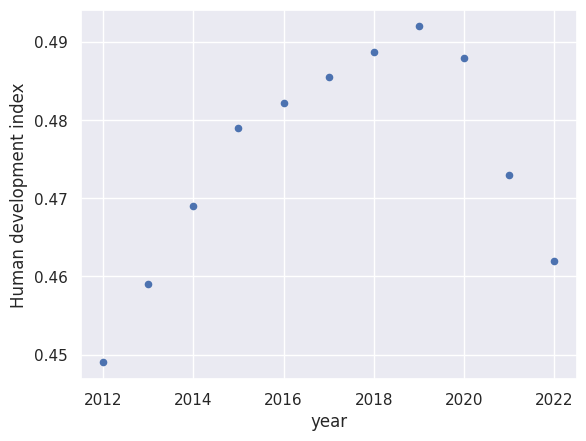

In [ ]:
# plot the HDI
new_df.head(12).plot(kind = 'scatter', x = 'year', y = 'Human development index')

<Axes: xlabel='year', ylabel='Human development index'>

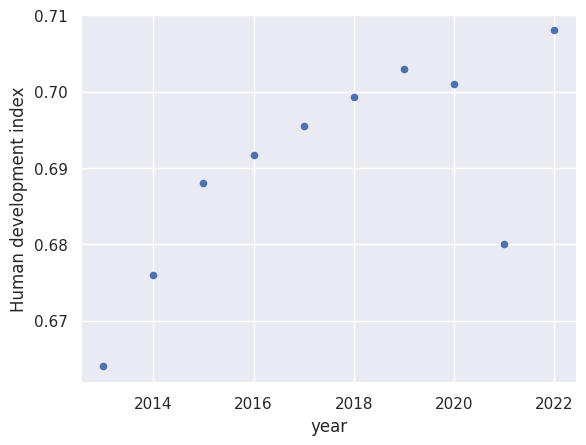

In [ ]:
# plot the HDI
new_df.tail(11).plot(kind = 'scatter', x = 'year', y = 'Human development index')

In [ ]:
# count NAs
new_df.isna().sum()

,0
index,0
country,0
year,0
Risk,0
Event,0
Total events,0
Food loss,139
Road infrastructure,139
Forest change,139
Flooding,139


In [ ]:
# See the shape
new_df.shape

(1668, 14)

In [ ]:
# create interpolation for HDI
interpolation = new_df.groupby(['country','year'],as_index = False)['Human development index'].mean().interpolate()
interpolation

<ipython-input-108-2dc17c3dcf79>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolation = new_df.groupby(['country','year'],as_index = False)['Human development index'].mean().interpolate()


,country,year,Human development index
0,Afghanistan,2012,0.44900
1,Afghanistan,2013,0.45900
2,Afghanistan,2014,0.46900
3,Afghanistan,2015,0.47900
4,Afghanistan,2016,0.48225
...,...,...,...
1663,Zimbabwe,2019,0.70300
1664,Zimbabwe,2020,0.70100
1665,Zimbabwe,2021,0.68000
1666,Zimbabwe,2022,0.70800


In [ ]:
# extract index
interpolation.index = new_df.index

In [ ]:
# interpolation
new_df['Human development index'] = interpolation['Human development index']
new_df.drop('index', inplace= True, axis= 'columns')
new_df

<ipython-input-110-ff0916a38ae1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Human development index'] = interpolation['Human development index']
<ipython-input-110-ff0916a38ae1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('index', inplace= True, axis= 'columns')


,country,year,Risk,Event,Total events,Food loss,Road infrastructure,Forest change,Flooding,Armed conflict,Land degradation,Access to drinking water,Human development index
0,Afghanistan,2012,2.0,4.0,15.0,3.1950,2.0,-0.0700,2.3875,2.0,12.0,69.8,0.44900
1,Afghanistan,2013,2.0,4.0,19.0,3.6200,1.0,-1.1900,7.7500,0.0,17.0,94.6,0.45900
2,Afghanistan,2014,2.0,4.0,23.0,10.3450,0.0,-0.8800,1.8075,1.0,24.5,63.2,0.46900
3,Afghanistan,2015,2.0,4.0,27.0,7.7675,1.0,0.5625,5.0250,1.0,23.0,79.4,0.47900
4,Afghanistan,2016,2.0,4.0,31.0,5.1900,2.0,2.0050,8.2425,1.0,21.5,95.6,0.48225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,Zimbabwe,2019,3.0,4.0,43.0,7.6150,1.0,-3.4800,-5.3560,1.0,8.5,87.6,0.70300
1802,Zimbabwe,2020,3.0,4.0,47.0,3.6700,1.0,-1.4100,1.1250,2.0,22.5,72.1,0.70100
1803,Zimbabwe,2021,3.0,4.0,51.0,2.6200,3.0,0.2800,8.4100,0.0,6.0,99.9,0.68000
1804,Zimbabwe,2022,1.0,4.0,55.0,6.3200,1.0,-0.0850,5.2350,1.0,31.5,93.6,0.70800


<Axes: xlabel='year', ylabel='Human development index'>

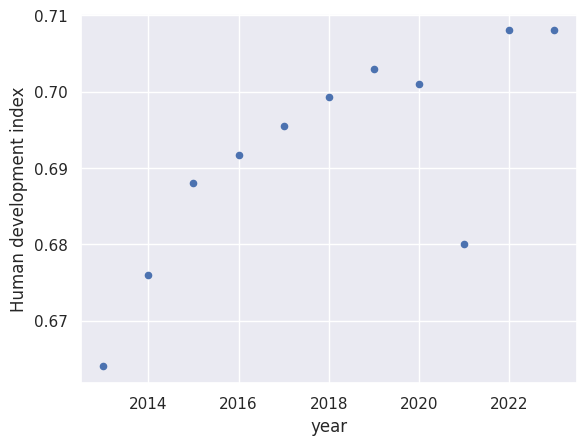

In [ ]:
#plot the interpolation
new_df.tail(11).plot(kind = 'scatter', x = 'year', y = 'Human development index')

<Axes: xlabel='year', ylabel='Human development index'>

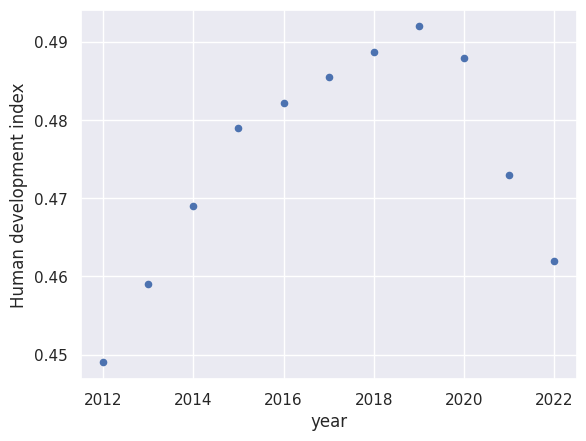

In [ ]:
# plot interpolation
new_df.head(11).plot(kind = 'scatter', x = 'year', y = 'Human development index')

# EDA

In [ ]:
# see the summaries
new_df.describe()

,year,Risk,Event,Total events,Food loss,Road infrastructure,Forest change,Flooding,Armed conflict,Land degradation,Access to drinking water,Human development index
count,1668.000000,1668.000000,1668.000000,1668.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1668.000000
mean,2017.500000,0.546163,1.075540,9.067746,5.320033,1.757358,-0.643185,4.872719,1.014388,19.549706,86.127158,0.695152
std,3.453088,0.924065,1.727453,15.316837,2.970121,1.134588,2.136766,4.662306,1.142264,16.190851,17.190808,0.161113
min,2012.000000,0.000000,0.000000,0.000000,0.560000,0.000000,-14.280000,-12.280000,0.000000,1.000000,34.200000,0.336000
25%,2014.750000,0.000000,0.000000,0.000000,3.200000,1.000000,-1.570000,2.086000,0.000000,7.000000,75.800000,0.552000
50%,2017.500000,0.000000,0.000000,0.000000,4.760000,2.000000,-0.010000,5.750000,1.000000,16.000000,94.000000,0.716708
75%,2020.250000,1.000000,3.000000,13.000000,6.660000,3.000000,0.400000,8.184000,1.000000,27.000000,99.600000,0.824062
max,2023.000000,3.000000,4.000000,58.000000,20.320000,4.000000,5.290000,16.140000,4.000000,97.000000,100.000000,0.967000


In [ ]:
# Calculate the number of outliers per column
def count_outliers(df):
    outlier_counts = {}

    for col in df.select_dtypes(include=[float, int]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

    return outlier_counts

# Get the number of outliers per column
outliers_per_column = count_outliers(new_df)
outliers_per_column

{'year': 0,
 'Risk': 76,
 'Event': 0,
 'Total events': 195,
 'Food loss': 45,
 'Road infrastructure': 0,
 'Forest change': 82,
 'Flooding': 25,
 'Armed conflict': 184,
 'Land degradation': 51,
 'Access to drinking water': 6,
 'Human development index': 0}

In [ ]:
82*100 /1668

4.916067146282973

In [ ]:
# Melt DataFrame to long-form format for Seaborn
df_melted = new_df.melt(var_name='Column', value_name='Value')

Text(0, 0.5, 'Values')

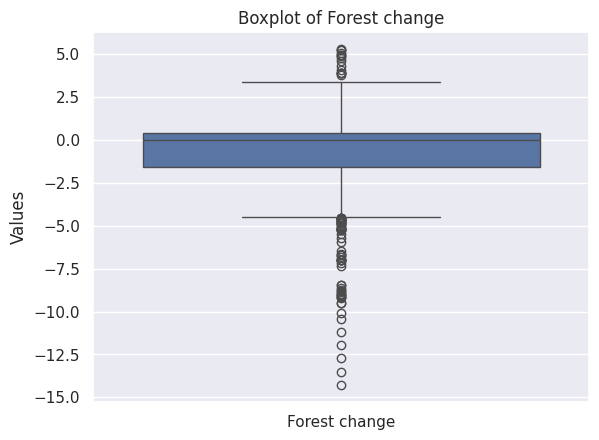

In [ ]:
# Create boxplot using Seaborn
sns.boxplot(x='Column', y='Value', data=df_melted.loc[df_melted['Column'] == 'Forest change',])
# Add title and labels
plt.title('Boxplot of Forest change')
plt.xlabel('')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

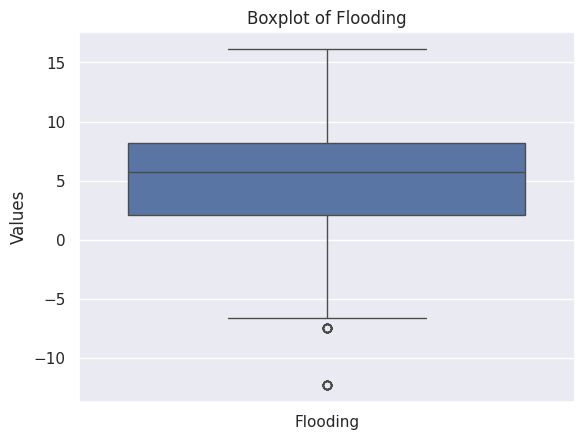

In [ ]:
# Create boxplot using Seaborn
sns.boxplot(x='Column', y='Value', data=df_melted.loc[df_melted['Column'] == 'Flooding',])
# Add title and labels
plt.title('Boxplot of Flooding')
plt.xlabel('')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

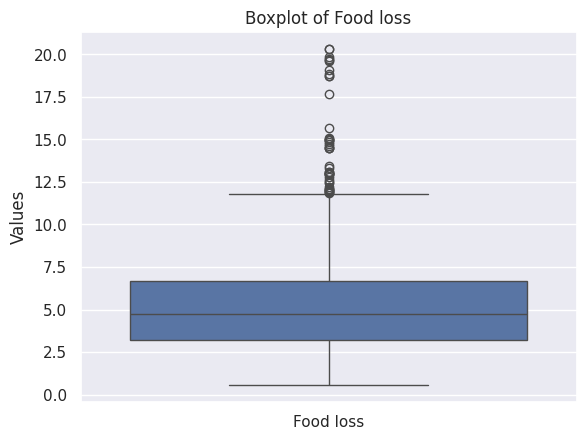

In [ ]:
# Create boxplot using Seaborn
sns.boxplot(x='Column', y='Value', data=df_melted.loc[df_melted['Column'] == 'Food loss',])
# Add title and labels
plt.title('Boxplot of Food loss')
plt.xlabel('')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

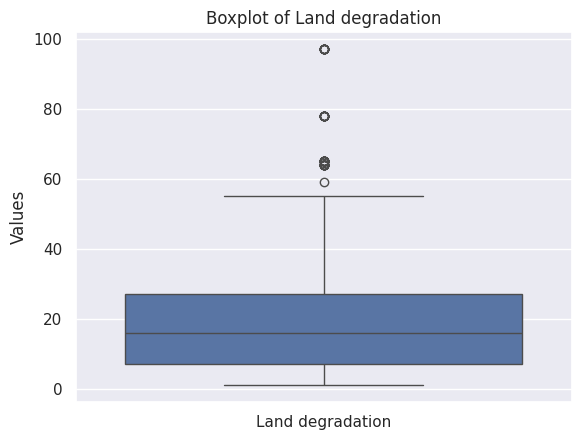

In [ ]:
# Create boxplot using Seaborn
sns.boxplot(x='Column', y='Value', data=df_melted.loc[df_melted['Column'] == 'Land degradation',])
# Add title and labels
plt.title('Boxplot of Land degradation')
plt.xlabel('')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

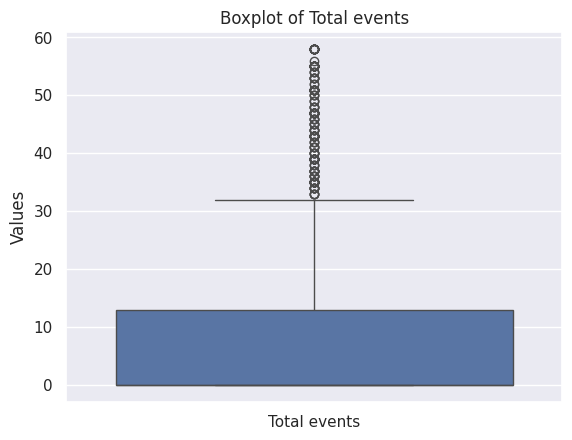

In [ ]:
# Create boxplot using Seaborn
sns.boxplot(x='Column', y='Value', data=df_melted.loc[df_melted['Column'] == 'Total events',])
# Add title and labels
plt.title('Boxplot of Total events')
plt.xlabel('')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

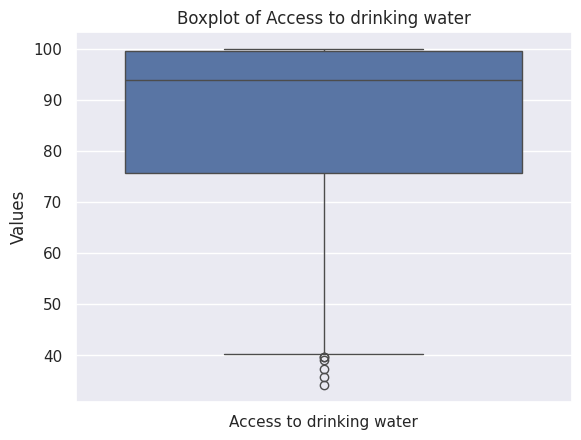

In [ ]:
# Create boxplot using Seaborn
sns.boxplot(x='Column', y='Value', data=df_melted.loc[df_melted['Column'] == 'Access to drinking water',])
# Add title and labels
plt.title('Boxplot of Access to drinking water')
plt.xlabel('')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

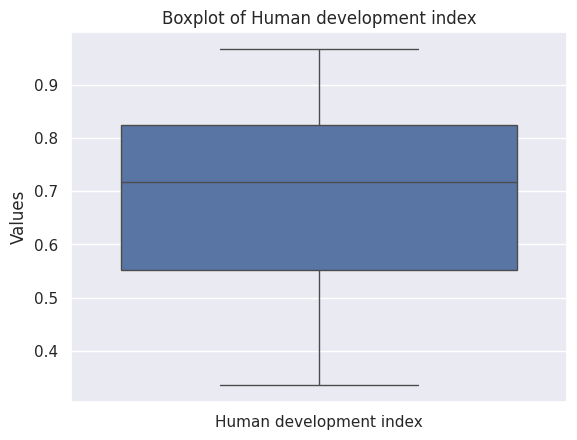

In [ ]:
# Create boxplot using Seaborn
sns.boxplot(x='Column', y='Value', data=df_melted.loc[df_melted['Column'] == 'Human development index',])
# Add title and labels
plt.title('Boxplot of Human development index')
plt.xlabel('')
plt.ylabel('Values')

In [ ]:
# select events
new_df.loc[:, 'target'] = new_df['Event'] >= 1

<ipython-input-124-7e6b3ebe24d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'target'] = new_df['Event'] >= 1


target
False    1186
True      482
Name: count, dtype: int64
target
False    0.711031
True     0.288969
Name: proportion, dtype: float64


<Axes: xlabel='target'>

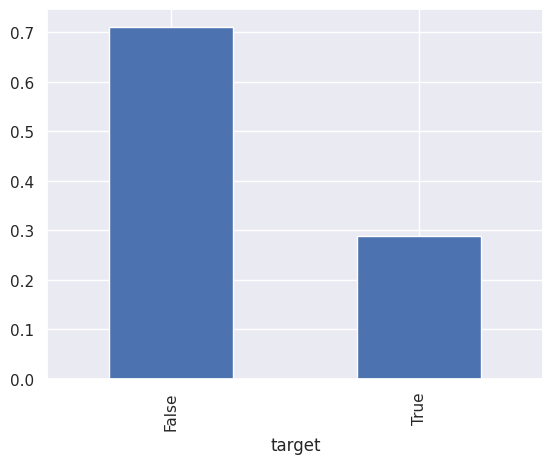

In [ ]:
# Creat count of targets
print(new_df['target'].value_counts())
print(new_df['target'].value_counts(normalize=True))
new_df['target'].value_counts(normalize=True).plot.bar()

Text(0.5, 1.0, 'Normalized Value Counts of Target')

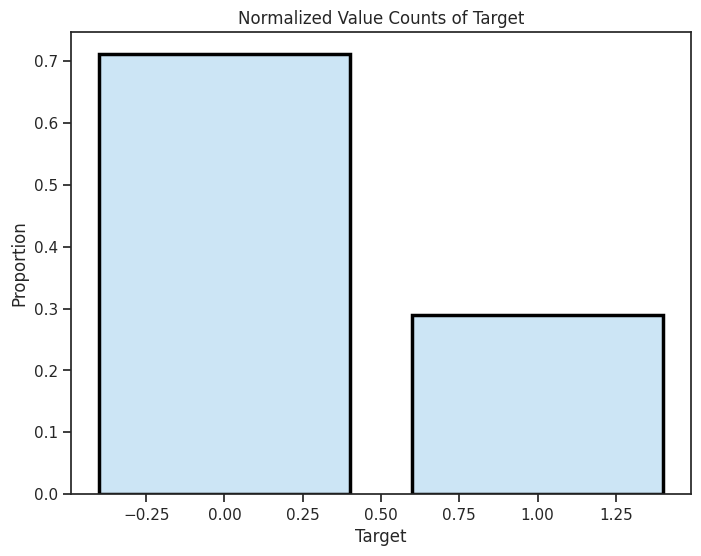

In [ ]:
# Set the theme and color
sns.set_theme(style="ticks")

# Compute value counts and normalize
value_counts = new_df['target'].value_counts(normalize=True)

# Plot bar chart with Matplotlib
plt.figure(figsize=(8, 6))

# Plot bars with color and edgecolor
bars = plt.bar(value_counts.index, value_counts.values, color='#cce5f5', edgecolor='black',  linewidth=2.5)

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Proportion')
plt.title('Normalized Value Counts of Target')

<Axes: xlabel='Risk'>

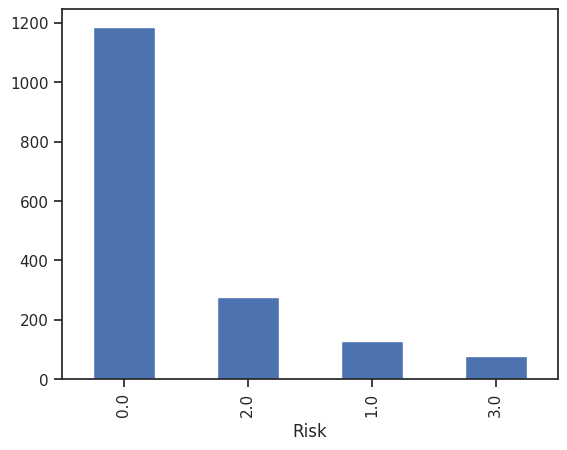

In [ ]:
# Create plot for Risk
new_df['Risk'].value_counts().plot(kind= 'bar')

In [ ]:
# Describe Total events
new_df['Total events'].describe()

,Total events
count,1668.000000
mean,9.067746
std,15.316837
min,0.000000
25%,0.000000
50%,0.000000
75%,13.000000
max,58.000000


<Axes: >

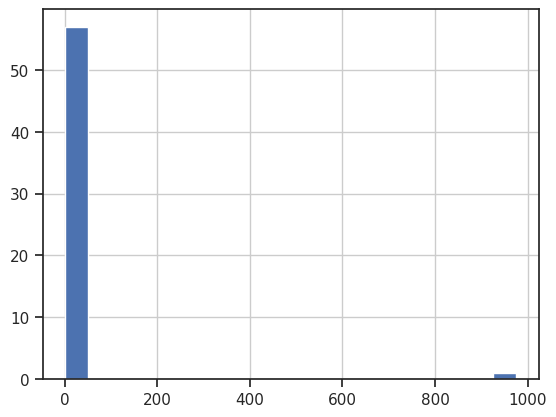

In [ ]:
# Plot total events
new_df['Total events'].value_counts().hist(bins=20)

<Axes: >

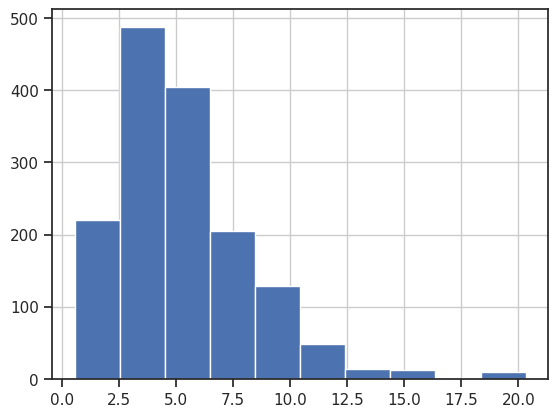

In [ ]:
# Plot food loss
new_df['Food loss'].hist()

<Axes: xlabel='Road infrastructure'>

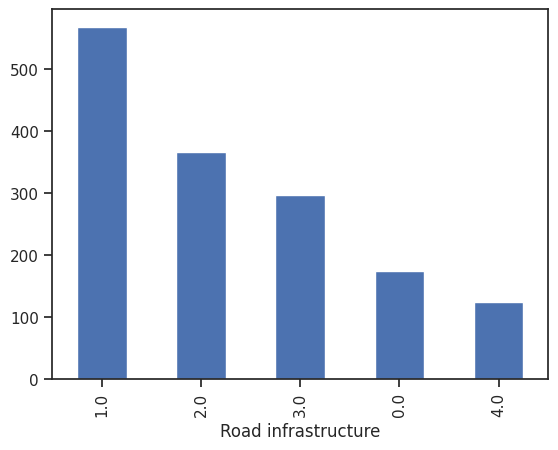

In [ ]:
# Plot road infrastructure
new_df['Road infrastructure'].value_counts().plot(kind='bar')

<Axes: >

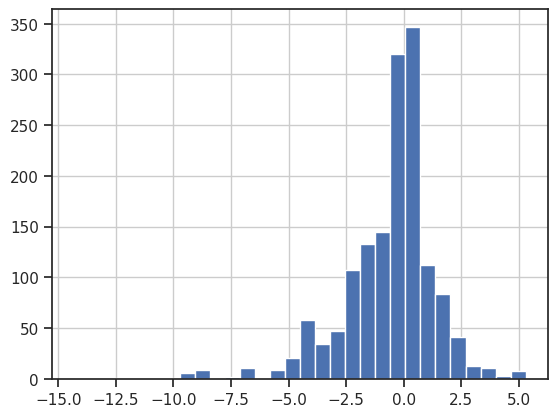

In [ ]:
# Plot Forest change
new_df['Forest change'].hist(bins = 30)

<Axes: >

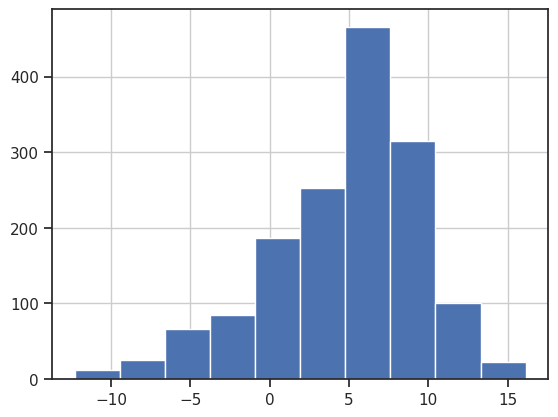

In [ ]:
# Plot flooding
new_df['Flooding'].hist()

<Axes: xlabel='Armed conflict'>

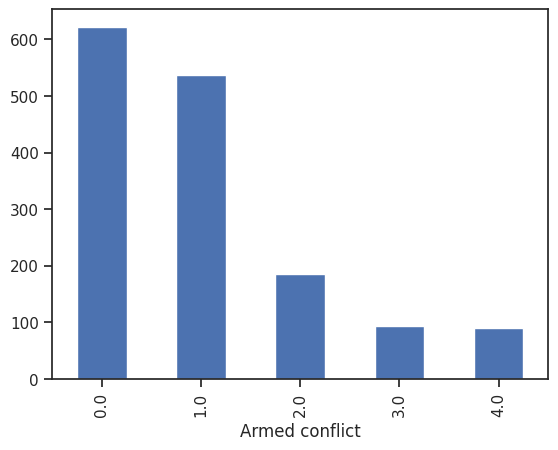

In [ ]:
# Plot Armed conflict
new_df['Armed conflict'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Land degradation'>

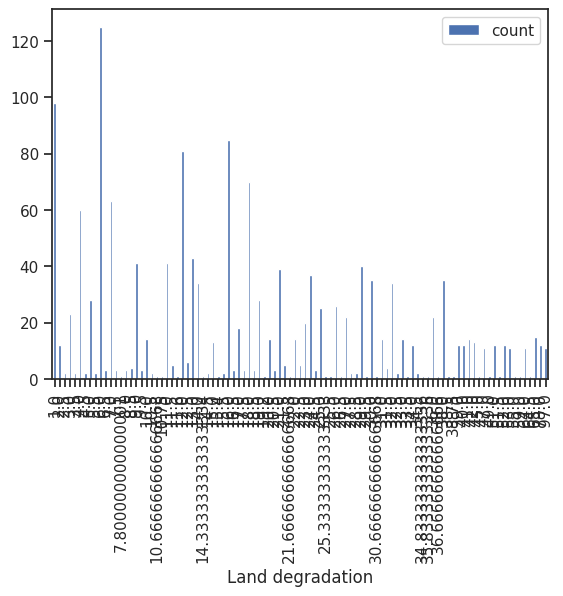

In [ ]:
# Plot Land degradation
new_df['Land degradation'].value_counts().to_frame().sort_index().plot(kind='bar')

<Axes: >

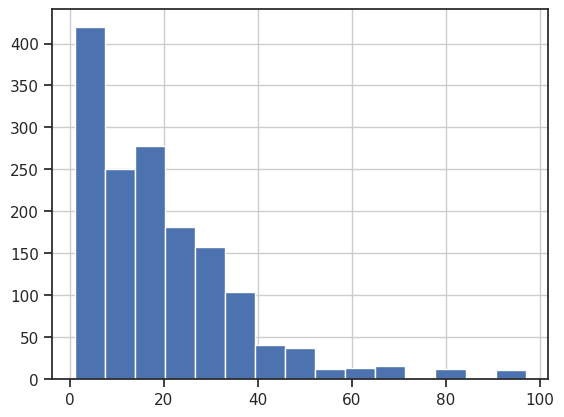

In [ ]:
# Plot land degradation
new_df['Land degradation'].hist(bins= 15)

In [ ]:
# Created target_delayed
new_df['target_delayed'], new_df['Risk_delayed'] = new_df['target'].shift(periods=-1), new_df['Risk'].shift(periods=-1)
new_df = new_df.loc[new_df['year'] != 2023]
new_df

<ipython-input-140-a7e8d3943be2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target_delayed'], new_df['Risk_delayed'] = new_df['target'].shift(periods=-1), new_df['Risk'].shift(periods=-1)
<ipython-input-140-a7e8d3943be2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target_delayed'], new_df['Risk_delayed'] = new_df['target'].shift(periods=-1), new_df['Risk'].shift(periods=-1)


,country,year,Risk,Event,Total events,Food loss,Road infrastructure,Forest change,Flooding,Armed conflict,Land degradation,Access to drinking water,Human development index,target,target_delayed,Risk_delayed
0,Afghanistan,2012,2.0,4.0,15.0,3.1950,2.0,-0.0700,2.3875,2.0,12.0,69.8,0.44900,True,True,2.0
1,Afghanistan,2013,2.0,4.0,19.0,3.6200,1.0,-1.1900,7.7500,0.0,17.0,94.6,0.45900,True,True,2.0
2,Afghanistan,2014,2.0,4.0,23.0,10.3450,0.0,-0.8800,1.8075,1.0,24.5,63.2,0.46900,True,True,2.0
3,Afghanistan,2015,2.0,4.0,27.0,7.7675,1.0,0.5625,5.0250,1.0,23.0,79.4,0.47900,True,True,2.0
4,Afghanistan,2016,2.0,4.0,31.0,5.1900,2.0,2.0050,8.2425,1.0,21.5,95.6,0.48225,True,True,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,Zimbabwe,2018,2.0,4.0,39.0,6.2200,2.0,0.1800,7.9925,0.0,15.0,78.7,0.69925,True,True,3.0
1801,Zimbabwe,2019,3.0,4.0,43.0,7.6150,1.0,-3.4800,-5.3560,1.0,8.5,87.6,0.70300,True,True,3.0
1802,Zimbabwe,2020,3.0,4.0,47.0,3.6700,1.0,-1.4100,1.1250,2.0,22.5,72.1,0.70100,True,True,3.0
1803,Zimbabwe,2021,3.0,4.0,51.0,2.6200,3.0,0.2800,8.4100,0.0,6.0,99.9,0.68000,True,True,1.0


Text(0.5, 1.0, 'Correlation Heatmap')

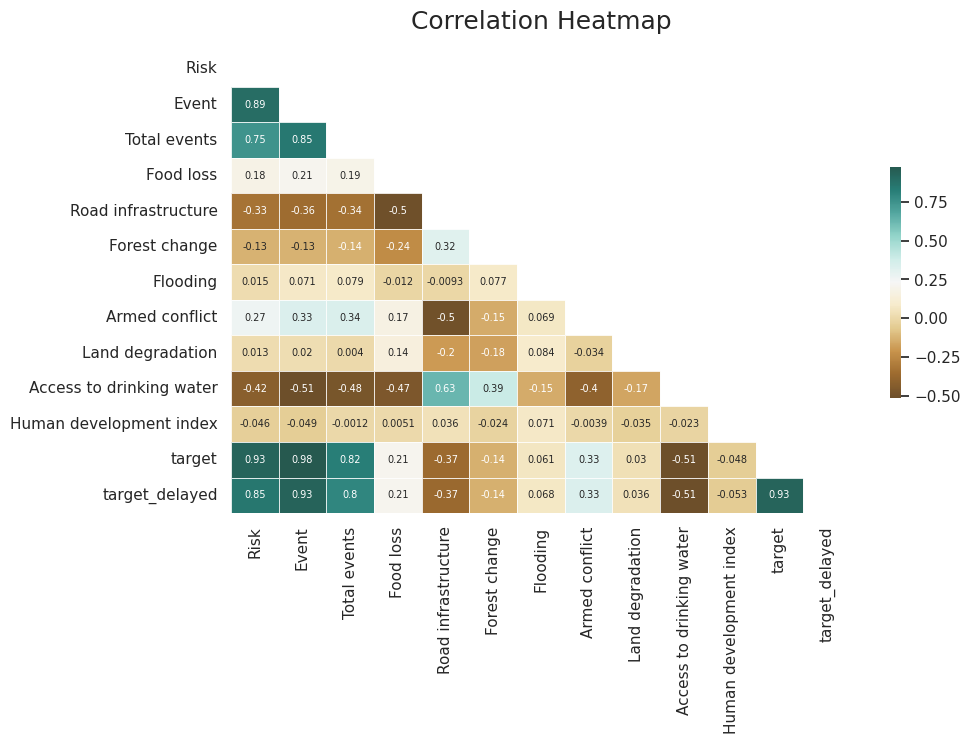

In [ ]:
# create vari
vari = ['Risk', 'Event', 'Total events', 'Food loss',
       'Road infrastructure', 'Forest change', 'Flooding', 'Armed conflict',
       'Land degradation', 'Access to drinking water',
       'Human development index', 'target','target_delayed']
sns.set_theme(style="white")
corr = new_df[vari].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap with the mask applied
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr,
            mask=mask,   # Mask for the upper triangle
            ax=ax,
            annot=True,
            annot_kws={"size": 7},
            cmap = 'BrBG',
            linewidths = 0.5,  cbar_kws = {"shrink": .5},
            alpha=0.85).set_title('Correlation Heatmap',
                                  fontdict={'fontsize': 18}, pad=16)

<Axes: >

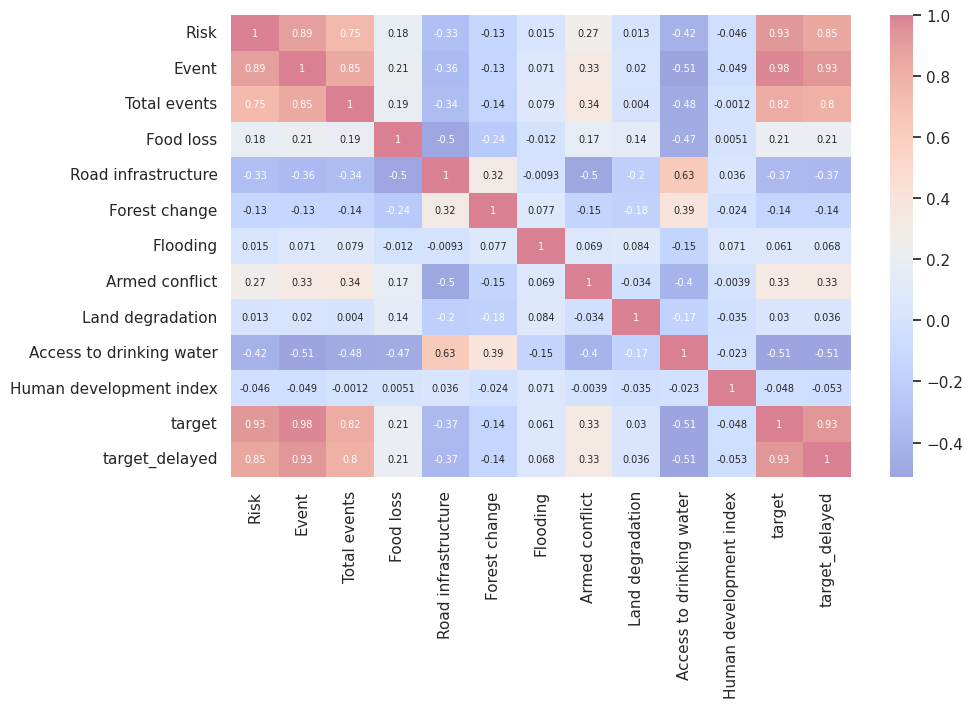

In [ ]:
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, ax=ax, annot=True, annot_kws={"size": 7}, cmap='coolwarm', alpha =0.5)

In [ ]:
# Calculate correlation
correlations_df = corr[['target_delayed']].sort_values(by='target_delayed', ascending=False)

In [ ]:
# formating correlation
correlations_df['target_delayed'] = corr['target_delayed'].apply(lambda x: abs(x))
correlations_df.sort_values(by='target_delayed', ascending=False, inplace=True)

In [ ]:
correlations_df

,target_delayed
target_delayed,1.000000
Event,0.934353
target,0.931771
Risk,0.852528
Total events,0.796929
Access to drinking water,0.512978
Road infrastructure,0.371585
Armed conflict,0.334177
Food loss,0.207097
Forest change,0.139623


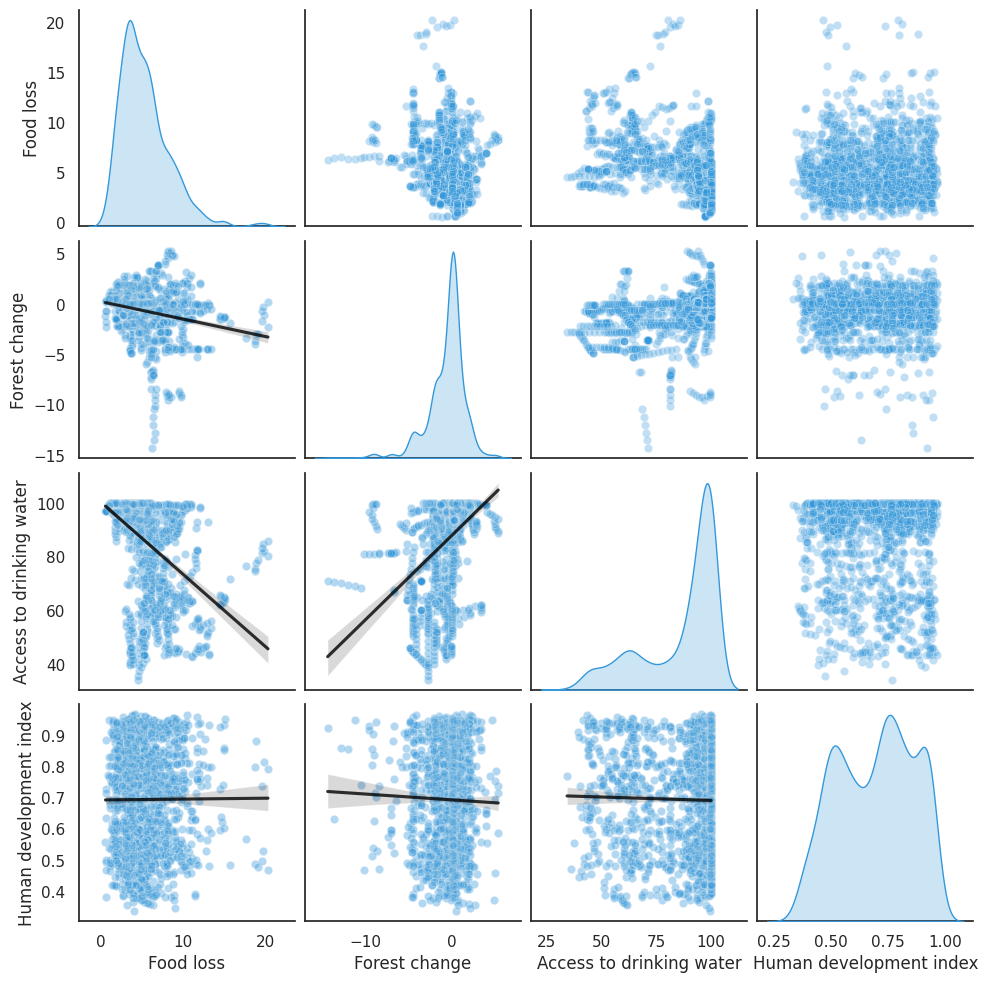

In [ ]:
# Create a pairplot
g = sns.pairplot(new_df[['Food loss',
                     'Forest change',
                     'Access to drinking water',
                     'Human development index']],
             diag_kind="kde",
                 diag_kws={'color': '#3498db'},
             plot_kws={'alpha':0.3,
                       'edgecolor' : 'w',
                       'color': '#3498db'})
# Apply a regression plot to the lower triangle of the pairplot
g.map_lower(sns.regplot, scatter_kws={'alpha':0.1,
                       'edgecolor' : 'w',
                       'color': '#3498db'},
             line_kws={'color': 'black',
                       'alpha' : 0.8})

In [ ]:

plt.show()

<Axes: xlabel='Food loss', ylabel='Density'>

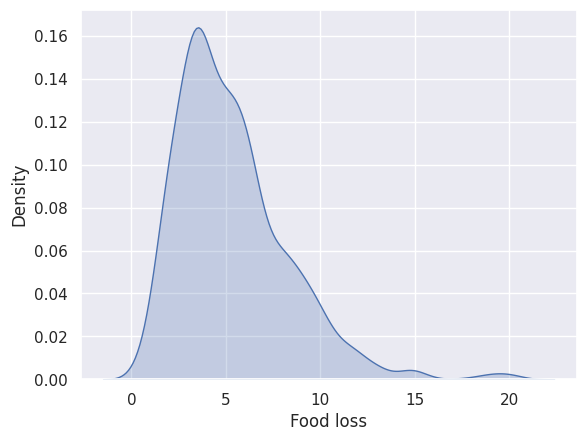

In [ ]:
sns.set_theme(style="darkgrid")
sns.kdeplot(new_df['Food loss'], fill=True)

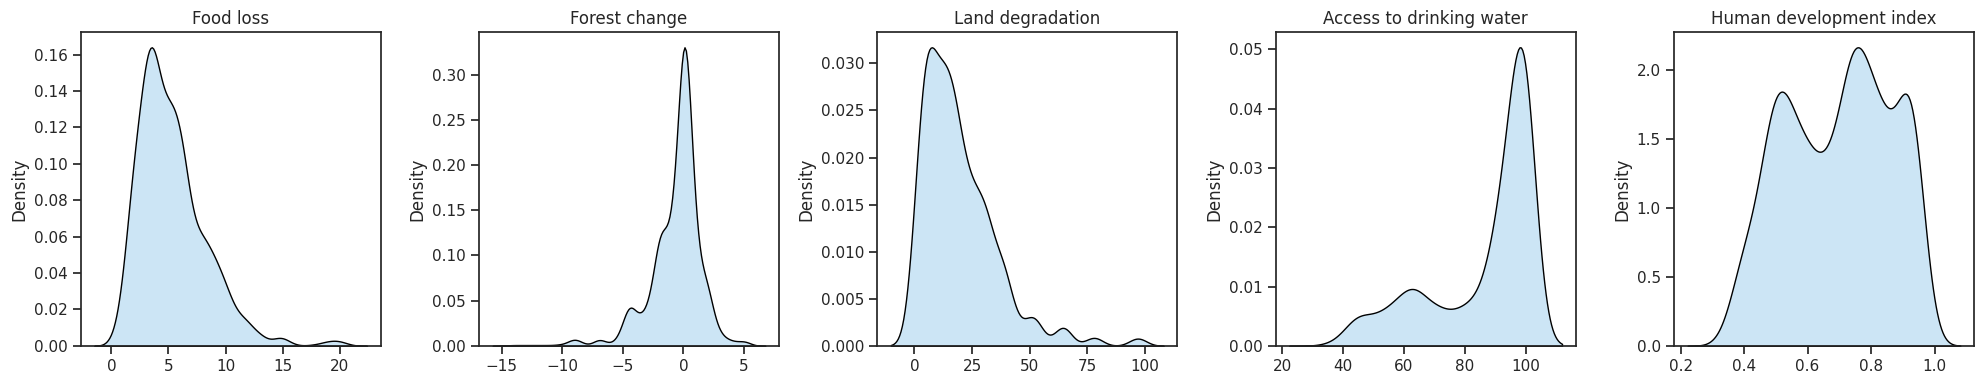

In [ ]:
# Set the theme and color
sns.set_theme(style="ticks")
color = '#3498db'

# Create a grid of subplots without sharing y-axis
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=False)

# List of variables and titles
variables = [
    'Food loss',
    'Forest change',
    'Land degradation',
    'Access to drinking water',
    'Human development index'
]

# Plot KDE for each variable
for ax, var in zip(axes, variables):
    sns.kdeplot(new_df[var], fill=True, color=color, ax=ax, ec='black')
    ax.set_title(var)
    ax.set_xlabel('')  # Clear x-labels for cleaner appearance
    ax.set_ylabel('Density')  # Set y-label for all subplots

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

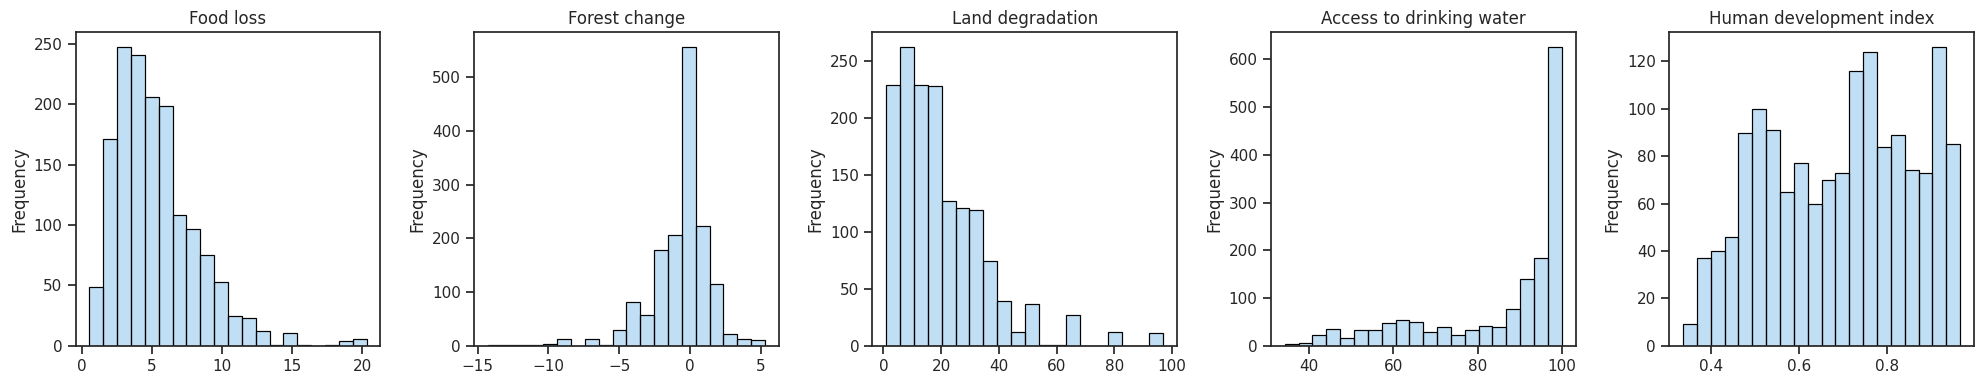

In [ ]:
# Set the theme and color
sns.set_theme(style="ticks")
color = '#3498db'
edgecolor = 'black'

# Create a grid of subplots without sharing y-axis
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=False)

# List of variables and titles
variables = [
    'Food loss',
    'Forest change',
    'Land degradation',
    'Access to drinking water',
    'Human development index'
]

# Plot histograms for each variable
for ax, var in zip(axes, variables):
    sns.histplot(new_df[var], bins=20, color=color,alpha = 0.3, ax=ax, kde=False,
                 element='bars', edgecolor=edgecolor)  # Add edgecolor
    ax.set_title(var)
    ax.set_xlabel('')  # Clear x-labels for cleaner appearance
    ax.set_ylabel('Frequency')  # Set y-label for all subplots

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Binary Classification

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1529 entries, 0 to 1804
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   1529 non-null   object 
 1   year                      1529 non-null   int32  
 2   Risk                      1529 non-null   float64
 3   Event                     1529 non-null   float64
 4   Total events              1529 non-null   float64
 5   Food loss                 1529 non-null   float64
 6   Road infrastructure       1529 non-null   float64
 7   Forest change             1529 non-null   float64
 8   Flooding                  1529 non-null   float64
 9   Armed conflict            1529 non-null   float64
 10  Land degradation          1529 non-null   float64
 11  Access to drinking water  1529 non-null   float64
 12  Human development index   1529 non-null   float64
 13  target                    1529 non-null   bool   
 14  target_delaye

# Preprocessing

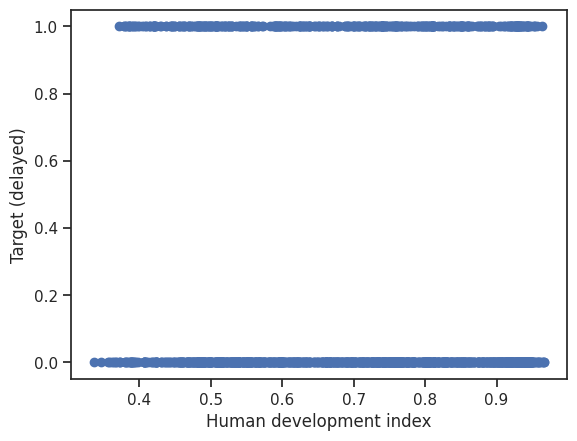

In [ ]:
# Scatter plot of HDI and target_Delayed
plt.scatter(new_df['Human development index'], new_df['target_delayed'])
plt.xlabel('Human development index')
plt.ylabel('Target (delayed)')
plt.show()

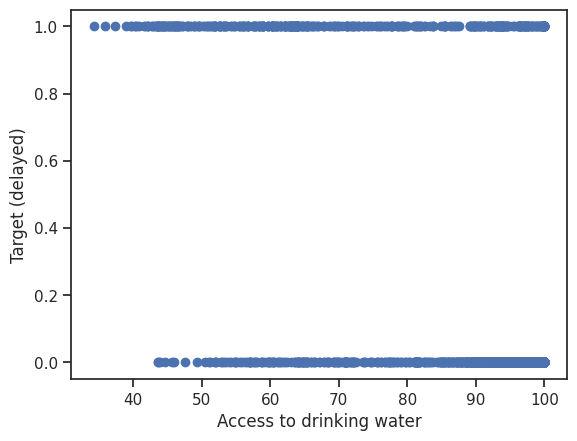

In [ ]:
# plot of access to drinking water and targer_delayed
plt.scatter(new_df['Access to drinking water'],new_df['target_delayed'])
plt.xlabel('Access to drinking water')
plt.ylabel('Target (delayed)')
plt.show()


**Assumptions:**
- Linearity
- No endogeneity
- Normality and homoscedasticity
- No autocorrelation
- No multicollinearity

In [ ]:
# changing target delayed as int
new_df['target_delayed'] = new_df['target_delayed'].astype(int)
new_df.head()

<ipython-input-154-f119990b91d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target_delayed'] = new_df['target_delayed'].astype(int)


,country,year,Risk,Event,Total events,Food loss,Road infrastructure,Forest change,Flooding,Armed conflict,Land degradation,Access to drinking water,Human development index,target,target_delayed,Risk_delayed
0,Afghanistan,2012,2.0,4.0,15.0,3.1950,2.0,-0.0700,2.3875,2.0,12.0,69.8,0.44900,True,1,2.0
1,Afghanistan,2013,2.0,4.0,19.0,3.6200,1.0,-1.1900,7.7500,0.0,17.0,94.6,0.45900,True,1,2.0
2,Afghanistan,2014,2.0,4.0,23.0,10.3450,0.0,-0.8800,1.8075,1.0,24.5,63.2,0.46900,True,1,2.0
3,Afghanistan,2015,2.0,4.0,27.0,7.7675,1.0,0.5625,5.0250,1.0,23.0,79.4,0.47900,True,1,2.0
4,Afghanistan,2016,2.0,4.0,31.0,5.1900,2.0,2.0050,8.2425,1.0,21.5,95.6,0.48225,True,1,2.0


In [ ]:
# see the data summary
new_df.describe()

,year,Risk,Event,Total events,Food loss,Road infrastructure,Forest change,Flooding,Armed conflict,Land degradation,Access to drinking water,Human development index,target_delayed,Risk_delayed
count,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000
mean,2017.000000,0.545455,1.086331,8.505559,5.320033,1.757358,-0.643185,4.872719,1.014388,19.549706,86.127158,0.694267,0.293002,0.548071
std,3.163312,0.928424,1.754315,14.391047,2.970121,1.134588,2.136766,4.662306,1.142264,16.190851,17.190808,0.165092,0.455288,0.919081
min,2012.000000,0.000000,0.000000,0.000000,0.560000,0.000000,-14.280000,-12.280000,0.000000,1.000000,34.200000,0.336000,0.000000,0.000000
25%,2014.000000,0.000000,0.000000,0.000000,3.200000,1.000000,-1.570000,2.086000,0.000000,7.000000,75.800000,0.547000,0.000000,0.000000
50%,2017.000000,0.000000,0.000000,0.000000,4.760000,2.000000,-0.010000,5.750000,1.000000,16.000000,94.000000,0.716750,0.000000,0.000000
75%,2020.000000,1.000000,4.000000,13.000000,6.660000,3.000000,0.400000,8.184000,1.000000,27.000000,99.600000,0.829667,1.000000,1.000000
max,2022.000000,3.000000,4.000000,55.000000,20.320000,4.000000,5.290000,16.140000,4.000000,97.000000,100.000000,0.967000,1.000000,3.000000


In [ ]:
# create X and y
predictors = ['Risk',
              'Event',
              'Total events',
              'Food loss',
              'Road infrastructure',
              'Forest change',
              #'Flooding',
              'Armed conflict',
              #'Land degradation',
              'Human development index',
              'Access to drinking water']
X = new_df[predictors]
y = new_df['target_delayed']

In [ ]:
# Applying log transformation to 'Food loss'
#X['Food loss'] = np.log(X['Food loss'] + 0.0001)  # Adding 0.0001 to avoid log(0)

# Applying root transformation to 'Access to drinking water'
#X['Access to drinking water'] = np.sqrt(X['Access to drinking water'])

In [ ]:
# see unique coutnries
new_df['country'].nunique()

139

In [ ]:
# see count per group
y.value_counts().to_frame().reset_index()

,target_delayed,count
0,0,1081
1,1,448


In [ ]:
# apply bnorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(random_state = 42)
X, y = bsmote.fit_resample(X,y)

In [ ]:
y.value_counts().to_frame().reset_index()

,target_delayed,count
0,1,1081
1,0,1081


In [ ]:
# load libraries
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2309805)

In [ ]:
# load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Define the scalers
minmax_scaler = MinMaxScaler()
sd_scaler = StandardScaler()

#fit in Training
sd_scaler.fit(X_train.loc[:,['Forest change']])
minmax_scaler.fit(X_train.loc[:,['Food loss','Access to drinking water', 'Human development index']])

# transform in training and testing
X_train.loc[:,['Forest change']] = sd_scaler.transform(X_train.loc[:, ['Forest change']])
X_test.loc[:,['Forest change']] = sd_scaler.transform(X_test.loc[:, ['Forest change']])

X_train.loc[:,['Food loss','Access to drinking water','Human development index']] = minmax_scaler.transform(X_train.loc[:,['Food loss','Access to drinking water', 'Human development index']])
X_test.loc[:,['Food loss','Access to drinking water', 'Human development index']] = minmax_scaler.transform(X_test.loc[:, ['Food loss','Access to drinking water', 'Human development index']])

# Logistic Regression

In [ ]:
# load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, RocCurveDisplay, roc_auc_score
# To save the model
import pickle

In [ ]:
# Create the grid
LR_param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

# Create the cross validation object
KFold_cv = KFold(n_splits=10, shuffle=True, random_state=2309805)

# Instantiate the grid search object
LR_model = GridSearchCV(
	estimator = LogisticRegression(random_state = 2309805),
	param_grid = LR_param_grid,
	scoring = 'recall',
	n_jobs=2,
	cv = KFold_cv,
	refit = True,
  verbose = 0,
	return_train_score = True)

#Fit the object to our data
LR_model.fit(X_train, y_train)
# Make predictions
LR_y_pred = LR_model.predict(X_test)

# Print the best parameters and highest accuracy
print("Best parameters found: ", LR_model.best_params_)
print("\nBest Recall found: ", LR_model.best_score_)

Best parameters found:  {'C': 0.00026366508987303583, 'penalty': 'l1', 'solver': 'liblinear'}

Best Recall found:  0.9565541192230324


In [ ]:
recall_score(y_test,LR_y_pred)

0.9545454545454546

In [ ]:
accuracy_score(y_test, LR_y_pred)

0.8983050847457628

In [ ]:
LR_best_model = LogisticRegression(random_state = 2309805,
                                   C= 0.00026366508987303583,
                                   penalty = 'l1',
                                   solver = 'liblinear').fit(X_train,y_train)

In [ ]:
# Saving the model as a pickle file
pickle.dump(
    LR_best_model,  # Replace with your model
    open("LR_best_model.pkl", "wb"),  # Specify where to save the model
)

In [ ]:
# Load a pickle file
LR_best_model_loaded = pickle.load(
    open("/content/drive/MyDrive/Colab Notebooks/AI to predict famine/LR_best_model.pkl", "rb")  # Specify which file to load
)

LR_best_model_loaded

(array([0.5, 1.5]), [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

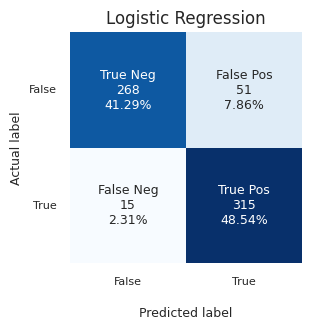

In [ ]:
# Confussion matrix
LR_cnf_matrix = confusion_matrix(y_test, LR_y_pred)

# Create a figure of size 3 x 3
plt.figure(figsize=(3, 3), dpi=100)

# Create the labels.
group_names = ['True Neg','False Pos', 'False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in LR_cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in LR_cnf_matrix.flatten()/np.sum(LR_cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(LR_cnf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"fontsize":9})

# Add the titles and labels.
plt.title("Logistic Regression")
plt.ylabel("Actual label", fontsize=9)
plt.xlabel("\nPredicted label", fontsize=9)

# Customize the tick labels
class_names = ['False', 'True']
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# SVM

In [ ]:
#Import svm model
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# To save the model
import pickle

In [ ]:
# Define a parameter grid with distributions of possible parameters to use
SVM_param_grid = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.1, 1, 10],
    "gamma": [0.00001, 0.0001, 0.001, 0.01, 0.1],
}

# Create the cross validation object
KFold_cv = KFold(n_splits=10, shuffle=True, random_state=2309805)

# Instantiate RandomizedSearchCV() with clf and the parameter grid
SVM_model = RandomizedSearchCV(
    estimator = svm.SVC(random_state = 2309805),
    n_iter = 40,
    param_distributions = SVM_param_grid,
    cv = KFold_cv,
    verbose = 0,
    random_state = 2309805,
    scoring = 'recall',
    n_jobs=2,
    refit=True)

# Fit the object to our data
SVM_model.fit(X_train, y_train)
SVM_y_pred = SVM_model.predict(X_test)

# Print the best parameters and highest accuracy
print("Best parameters found: ", SVM_model.best_params_)
print("\nBest recall found: ", SVM_model.best_score_)

Best parameters found:  {'kernel': 'poly', 'gamma': 0.1, 'C': 10}

Best recall found:  0.9063020583428939


In [ ]:
recall_score(y_test, SVM_y_pred)

0.9181818181818182

In [ ]:
accuracy_score(y_test, SVM_y_pred)

0.9460708782742681

In [ ]:
SVM_best_model = svm.SVC(random_state = 2309805,
                         kernel = 'poly',
                         gamma = 0.1,
                         C = 10).fit(X_train, y_train)

In [ ]:
# Saving the model as a pickle file
pickle.dump(
    SVM_best_model,  # Replace with your model
    open("SVM_best_model.pkl", "wb"),  # Specify where to save the model
)

In [ ]:
# Load a pickle file
SVM_best_model_loaded = pickle.load(
    open("/content/drive/MyDrive/Colab Notebooks/AI to predict famine/SVM_best_model.pkl", "rb")  # Specify which file to load
)

SVM_best_model_loaded

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


SVC(C=10, gamma=0.1, random_state=2309805)

(array([0.5, 1.5]), [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

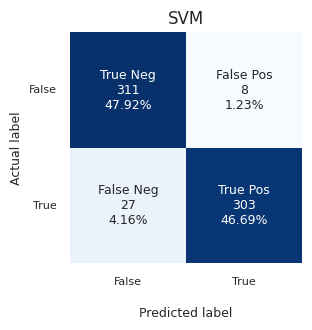

In [ ]:
# Confussion matrix
SVM_cnf_matrix = confusion_matrix(y_test, SVM_y_pred)
# Create a figure of size 3 x 3
plt.figure(figsize=(3, 3), dpi=100)

# Create the labels.
group_names = ['True Neg','False Pos', 'False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in SVM_cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in SVM_cnf_matrix.flatten()/np.sum(SVM_cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(SVM_cnf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"fontsize":9})

# Add the titles and labels.
plt.title("SVM")
plt.ylabel("Actual label", fontsize = 9)
plt.xlabel("\nPredicted label", fontsize = 9)

# Customize the tick labels
class_names = ['False', 'True']
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To save the model
import pickle

In [ ]:
# Define a parameter grid with distributions of possible parameters to use
KNN_param_grid = {
    "n_neighbors": np.linspace(1, 30, 30).astype(int),
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": np.linspace(1, 50, 6).astype(int),
    "p": [1,2]
}

# Create the cross validation object
KFold_cv = KFold(n_splits=10, shuffle=True, random_state=2309805)

# Instantiate GridSearch() with clf and the parameter grid
KNN_model = RandomizedSearchCV(
    estimator = KNeighborsClassifier(),
    n_iter = 200,
    param_distributions =  KNN_param_grid,
    random_state = 2309805,
    cv = KFold_cv,
    verbose = 0,
    scoring = 'recall',
    n_jobs=2,
    refit=True)

# Fit the object to our data
KNN_model.fit(X_train, y_train)
KNN_y_pred = KNN_model.predict(X_test)

# Print the best parameters and highest accuracy
print("Best parameters found: ", KNN_model.best_params_)
print("Best recall found: ", KNN_model.best_score_)

Best parameters found:  {'p': 2, 'n_neighbors': 3, 'leaf_size': 30, 'algorithm': 'kd_tree'}
Best recall found:  0.97170390327477


In [ ]:
recall_score(y_test, KNN_y_pred)

0.9757575757575757

In [ ]:
accuracy_score(y_test, KNN_y_pred)

0.9599383667180277

In [ ]:
KNN_best_model = KNeighborsClassifier(p = 2,
                                      n_neighbors = 3,
                                      leaf_size = 30,
                                      algorithm = 'kd_tree').fit(X_train, y_train)

In [ ]:
# Saving the model as a pickle file
pickle.dump(
    KNN_best_model,  # Replace with your model
    open("KNN_best_model.pkl", "wb"),  # Specify where to save the model
)

In [ ]:
# Load a pickle file
KNN_best_model_loaded = pickle.load(
    open("/content/drive/MyDrive/Colab Notebooks/AI to predict famine/KNN_best_model.pkl", "rb")  # Specify which file to load
)

KNN_best_model_loaded

(array([0.5, 1.5]), [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

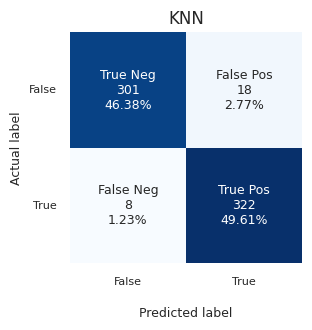

In [ ]:
# Confussion matrix
KNN_cnf_matrix = confusion_matrix(y_test, KNN_y_pred)

# Create a figure of size 3 x 3
plt.figure(figsize=(3, 3), dpi=100)

# Create the labels.
group_names = ['True Neg','False Pos', 'False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in KNN_cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in KNN_cnf_matrix.flatten()/np.sum(KNN_cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(KNN_cnf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"fontsize":9})

# Add the titles and labels.
plt.title("KNN")
plt.ylabel("Actual label", fontsize = 9)
plt.xlabel("\nPredicted label", fontsize = 9)

# Customize the tick labels
class_names = ['False', 'True']
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Decision Trees

In [ ]:
# ML Imports
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
# To save the model
import pickle

In [ ]:
# Define a parameter grid with distributions of possible parameters to use
DT_param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1, 2, 3, 4, 5, 6,7,8,9,10],
    'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
}

# Create the cross validation object
KFold_cv = KFold(n_splits=10, shuffle=True, random_state=2309805)

# Instantiate RandomizedSearchCV()
DT_model = RandomizedSearchCV(
    estimator = DecisionTreeClassifier(random_state = 2309805),
    n_iter = 300,
    param_distributions = DT_param_grid,
    cv = KFold_cv,
    verbose = 0,
    scoring = 'recall',
    n_jobs=-1,
    refit=True)

# Fit the object to our data
DT_model.fit(X_train, y_train)
DT_y_pred = DT_model.predict(X_test)

# Print the best parameters and highest accuracy
print("Best parameters found: ", DT_model.best_params_)
print("\nBest recall found: ", DT_model.best_score_)

Best parameters found:  {'splitter': 'best', 'min_samples_split': 4, 'max_depth': 10, 'criterion': 'entropy'}

Best recall found:  0.9631340835156832


In [ ]:
recall_score(y_test, DT_y_pred)

0.9757575757575757

In [ ]:
accuracy_score(y_test, DT_y_pred)

0.9722650231124808

In [ ]:
DT_best_model = DecisionTreeClassifier(splitter = 'best',
                                       min_samples_split = 4,
                                       max_depth = 10,
                                       criterion = 'entropy',
                                       random_state = 2309805).fit(X_train, y_train)

In [ ]:
# Saving the model as a pickle file
pickle.dump(
    DT_best_model,  # Replace with your model
    open("DT_best_model.pkl", "wb"),  # Specify where to save the model
)

In [ ]:
# Load a pickle file
DT_best_model_loaded = pickle.load(
    open("DT_best_model.pkl", "rb")  # Specify which file to load
)
DT_best_model_loaded

(array([0.5, 1.5]), [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

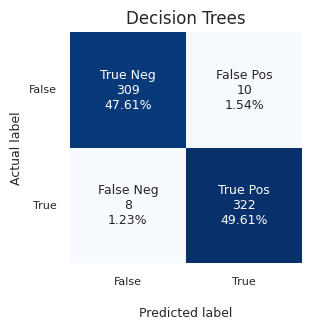

In [ ]:
# Confussion matrix
DT_cnf_matrix = confusion_matrix(y_test, DT_y_pred)

# Create a figure of size 3 x 3
plt.figure(figsize=(3, 3), dpi=100)

# Create the labels.
group_names = ['True Neg','False Pos', 'False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in DT_cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in DT_cnf_matrix.flatten()/np.sum(DT_cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(DT_cnf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"fontsize":9})

# Add the titles and labels.
plt.title("Decision Trees")
plt.ylabel("Actual label", fontsize = 9)
plt.xlabel("\nPredicted label", fontsize = 9)

# Customize the tick labels
class_names = ['False', 'True']
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


# Random Forest


In [ ]:
# ML Imports
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# To save the model
import pickle

In [ ]:
# Define a parameter grid with distributions of possible parameters to use
RF_param_grid = {'bootstrap': [True, False],
                 'max_depth': range(2,20,2),
                 'max_features': ['log2', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 'criterion' : ['gini', 'entropy'],
                 'n_estimators': [50,100, 200, 300]}

KFold_cv = KFold(n_splits=10, shuffle=True, random_state=2309805)

# Instantiate GridSearchCV() with clf and the parameter grid
RF_model = RandomizedSearchCV(
    estimator = RandomForestClassifier(random_state = 2309805),
    n_iter = 250,
    param_distributions = RF_param_grid,
    random_state = 2309805,
    cv = KFold_cv,
    verbose = 0,
    scoring = 'recall',
    n_jobs=2,
    refit=True)

# Fit the object to our data
RF_model.fit(X_train, y_train)
RF_y_pred = RF_model.predict(X_test)

# Print the best parameters and highest accuracy
print("Best parameters found: ", RF_model.best_params_)
print("Best recall found: ", RF_model.best_score_)

Best parameters found:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 14, 'criterion': 'entropy', 'bootstrap': False}
Best recall found:  0.9678830397282967


In [ ]:
recall_score(y_test, RF_y_pred)

0.9757575757575757

In [ ]:
accuracy_score(y_test, RF_y_pred)

0.9768875192604006

In [ ]:
 RF_best_model = RandomForestClassifier(n_estimators = 50,
                                        min_samples_split = 5,
                                        min_samples_leaf = 1,
                                        max_features = 'sqrt',
                                        max_depth =  14,
                                        criterion = 'entropy',
                                        bootstrap = False,
                                        random_state = 2309805).fit(X_train, y_train)

In [ ]:
# Saving the model as a pickle file
pickle.dump(
    RF_best_model,  # Replace with your model
    open("RF_best_model.pkl", "wb"),  # Specify where to save the model
)

In [ ]:
# Load a pickle file
RF_best_model_loaded = pickle.load(
    open("/content/drive/MyDrive/Colab Notebooks/AI to predict famine/RF_best_model.pkl", "rb")  # Specify which file to load
)
RF_best_model_loaded

(array([0.5, 1.5]), [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

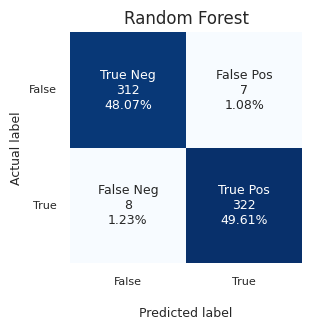

In [ ]:
# Confussion matrix
RF_cnf_matrix = confusion_matrix(y_test, RF_y_pred)

# Create a figure of size 3 x 3
plt.figure(figsize=(3, 3), dpi=100)

# Create the labels.
group_names = ['True Neg','False Pos', 'False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in RF_cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in RF_cnf_matrix.flatten()/np.sum(RF_cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(RF_cnf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"fontsize":9})

# Add the titles and labels.
plt.title("Random Forest")
plt.ylabel("Actual label", fontsize = 9)
plt.xlabel("\nPredicted label", fontsize = 9)

# Customize the tick labels
class_names = ['False', 'True']
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


# Gradient Boosting


In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score
# To save the model
import pickle

In [ ]:
# Convert the datasets into DMatrix
dtrain_xgb = xgb.DMatrix(X_train, label=y_train)
dtest_xgb = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# Create the cross validation object
KFold_cv = KFold(n_splits=10, shuffle=True, random_state=2309805)

GB_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 10],
}

GB_model = RandomizedSearchCV(estimator = xgb.XGBClassifier(objective='binary:logistic',random_state = 2309805),
                              n_iter = 200,
                              param_distributions = GB_param_grid,
                              scoring='recall',
                              cv = KFold_cv,
                              random_state = 2309805,
                              verbose=0,
                              n_jobs=2,
                              refit=True)

GB_model.fit(X_train, y_train)
GB_y_pred = GB_model.predict(X_test)

# Print the best parameters and highest accuracy
print("Best parameters found: ", GB_model.best_params_)
print("Best recall found: ", GB_model.best_score_)

In [ ]:
recall_score(y_test, GB_y_pred)

0.9787878787878788

In [ ]:
accuracy_score(y_test, GB_y_pred)

0.975346687211094

In [ ]:
GB_best_model = xgb.XGBClassifier(objective='binary:logistic',
                                  subsample = 0.6,
                                  reg_lambda = 1,
                                  reg_alpha = 1,
                                  max_depth = 4,
                                  learning_rate = 0.2,
                                  gamma = 0,
                                  colsample_bytree = 1.0,
                                  random_state = 2309805).fit(X_train, y_train)

In [ ]:
# Saving the model as a pickle file
pickle.dump(
    GB_best_model,  # Replace with your model
    open("GB_best_model.pkl", "wb"),  # Specify where to save the model
)

In [ ]:
# Load a pickle file
GB_best_model_loaded = pickle.load(
    open("GB_best_model.pkl", "rb")  # Specify which file to load
)
GB_best_model_loaded

In [ ]:
# Confussion matrix
GB_cnf_matrix = confusion_matrix(y_test, GB_y_pred)

# Create a figure of size 3 x 3
plt.figure(figsize=(3, 3), dpi=100)

# Create the labels.
group_names = ['True Neg','False Pos', 'False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in GB_cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in GB_cnf_matrix.flatten()/np.sum(GB_cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(GB_cnf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"fontsize":9})

# Add the titles and labels.
plt.title("Gradient Boosting")
plt.ylabel("Actual label", fontsize = 9)
plt.xlabel("\nPredicted label", fontsize = 9)

# Customize the tick labels
class_names = ['False', 'True']
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Multi-layer Perceptron

In [ ]:
X_train = X_train.values.astype('float32')
X_test = X_test.values.astype('float32')
y_train = y_train.values.astype('int32')
y_test = y_test.values.astype('int32')

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
# Import early stopping from keras callbacks
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner

In [ ]:
def build_model(hp):

    model = keras.Sequential()

    # Use an Input layer to define the input shape
    model.add(Input(shape = (X.values.shape[1],)))

    # Tune the number of units in the first Dense layer
    model.add(Dense(units = hp.Int(f"neurons_imp_layer", min_value=32, max_value=512, step=32),
                    activation = hp.Choice("activation_input", ["relu", "tanh"])))
    # Tune whether to use dropout.
    if hp.Boolean("1st_dropout"):
        model.add(Dropout(rate = hp.Float('Dropout', min_value=0.1, max_value=0.2, step=0.02)))

    for i in range(hp.Choice('n_layers', [1,2])):
      model.add(Dense(units = hp.Int(f"neurons_{i}_layer", min_value=32, max_value=512, step=32),
                      activation=hp.Choice(f"activation_{i}_hidden", ["relu", "tanh"])))
      # Tune whether to use BatchNormalization.
    if hp.Boolean("BatchNormalization"):
        model.add(BatchNormalization())

    # Tune whether to use dropout.
    if hp.Boolean("2nd_dropout"):
        model.add(Dropout(rate = hp.Float('Dropout', min_value=0.1, max_value=0.2, step=0.02)))

    model.add(Dense(1, activation="sigmoid"))

    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-2, sampling="log")

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy", "Recall"],
    )

    return model

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective = 'val_loss',
    max_trials = 50,
    seed = 2309805,
    executions_per_trial = 2,
    directory = 'Results_final_SMOTE')

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience = 3,          # Number of epochs to wait before stopping if no improvement
    restore_best_weights = True  # Restore the best weights once stopping occurs
)

In [ ]:
tuner.search(x = X_train,
             y = y_train,
             epochs = 50,
             validation_data = (X_test, y_test),
             batch_size = 32,
             callbacks=[early_stopping])

Trial 50 Complete [00h 00m 48s]
val_loss: 0.1806255728006363

Best val_loss So Far: 0.08923251554369926
Total elapsed time: 00h 27m 54s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'neurons_imp_layer': 416,
 'activation_input': 'relu',
 '1st_dropout': False,
 'n_layers': 1,
 'neurons_0_layer': 384,
 'activation_0_hidden': 'relu',
 'BatchNormalization': True,
 '2nd_dropout': True,
 'learning_rate': 4.94912956066226e-05,
 'neurons_1_layer': 256,
 'activation_1_hidden': 'tanh',
 'Dropout': 0.2}

In [ ]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)

# Build the model with the best hp.
MLP_best_model = build_model(best_hps[0])

# Fit with the entire dataset.
MLP_best_model_history = MLP_best_model.fit(x = X_train, y = y_train,
                                            epochs=50,
                                            validation_data = (X_test, y_test),
                                            batch_size = 32,
                                            callbacks= [early_stopping])

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - Recall: 0.6683 - accuracy: 0.5937 - loss: 0.8098 - val_Recall: 0.6364 - val_accuracy: 0.7643 - val_loss: 0.6737
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - Recall: 0.8803 - accuracy: 0.8942 - loss: 0.2438 - val_Recall: 0.6576 - val_accuracy: 0.7858 - val_loss: 0.6508
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - Recall: 0.8849 - accuracy: 0.9170 - loss: 0.2060 - val_Recall: 0.7576 - val_accuracy: 0.8505 - val_loss: 0.5251
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - Recall: 0.9059 - accuracy: 0.9292 - loss: 0.1842 - val_Recall: 0.8667 - val_accuracy: 0.9214 - val_loss: 0.4096
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - Recall: 0.9102 - accuracy: 0.9407 - loss: 0.1687 - val_Recall: 0.9121 - val_accuracy: 0.9430 - val_loss: 0.3136
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - Recall: 0.9077 - accuracy: 0.9344 - loss: 0.1576 - val_Recall: 0.9152 - val_accuracy: 0.9461 - val_loss: 0.2523
Epoch 7/50

In [ ]:
# Get the predicted probabilities
MLP_y_predicted_probabilities = MLP_best_model.predict(X_test)

# Convert probabilities to binary class labels
MLP_y_pred = (MLP_y_predicted_probabilities >= 0.5).astype(int)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


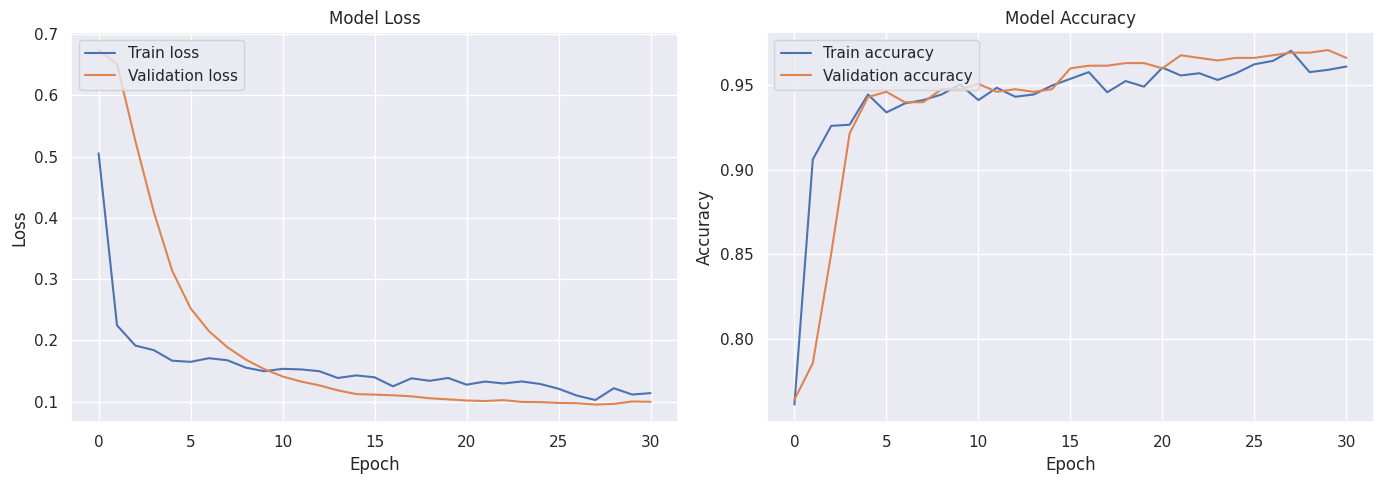

In [ ]:
# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot the loss on the first subplot
ax1.plot(MLP_best_model_history.history['loss'], label='Train loss')
ax1.plot(MLP_best_model_history.history['val_loss'], label='Validation loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
ax1.set_title('Model Loss')

# Plot the accuracy on the second subplot
ax2.plot(MLP_best_model_history.history['accuracy'], label='Train accuracy')
ax2.plot(MLP_best_model_history.history['val_accuracy'], label='Validation accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
ax2.set_title('Model Accuracy')

# Display the combined plot
plt.tight_layout()
plt.show()

In [ ]:
recall_score(y_test, MLP_y_pred)

0.9666666666666667

In [ ]:
accuracy_score(y_test, MLP_y_pred)

0.9691833590138675

(array([0.5, 1.5]), [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

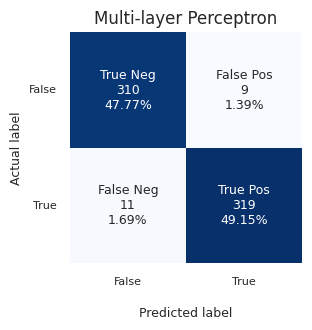

In [ ]:
# Confussion matrix
MLP_cnf_matrix = confusion_matrix(y_test, MLP_y_pred)

# Create a figure of size 3 x 3
plt.figure(figsize=(3, 3), dpi=100)

# Create the labels.
group_names = ['True Neg','False Pos', 'False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in MLP_cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in MLP_cnf_matrix.flatten()/np.sum(MLP_cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(MLP_cnf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"fontsize":9})

# Add the titles and labels.
plt.title("Multi-layer Perceptron")
plt.ylabel("Actual label", fontsize = 9)
plt.xlabel("\nPredicted label", fontsize = 9)

# Customize the tick labels
class_names = ['False', 'True']
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels = class_names, rotation=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


# Comparing models

In [ ]:
models = []
models.append(('Logistic Regression', LR_best_model))
models.append(('Support Vector Machines', SVM_best_model))
models.append(('k-Nearest Neighbors', KNN_best_model))
models.append(('Decision Trees', DT_best_model))
models.append(('Random Forest', RF_best_model))
models.append(('Gradient Boosting', GB_best_model))
models.append(('Multi-layer Perceptron', MLP_best_model))

# evaluate each model in turn

names = []
accuracy = []
precision = []
recall = []
ROC_AUC = []

(MLP_y_predicted_probabilities >= 0.5).astype(int)
scoring = 'accuracy'

for name, model in models:
  predictions = model.predict(X_test)
  accuracy.append(accuracy_score(y_test, (predictions>= 0.5).astype(int)))
  precision.append(precision_score(y_test, (predictions>= 0.5).astype(int)))
  recall.append(recall_score(y_test, (predictions>= 0.5).astype(int)))
  ROC_AUC.append(roc_auc_score(y_test, (predictions>= 0.5).astype(int)))
  names.append(name)

results = pd.DataFrame({'Model': names, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC_AUC': ROC_AUC})

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
results[['Model', 'Recall',	'Accuracy',	'Precision', 'ROC_AUC']].sort_values(by = ['Recall','Accuracy'], ascending = False)

,Model,Recall,Accuracy,Precision,ROC_AUC
5,Gradient Boosting,0.978788,0.975347,0.972892,0.975287
4,Random Forest,0.975758,0.976888,0.978723,0.976907
3,Decision Trees,0.975758,0.972265,0.969880,0.972205
2,k-Nearest Neighbors,0.975758,0.959938,0.947059,0.959666
6,Multi-layer Perceptron,0.966667,0.969183,0.972561,0.969227
0,Logistic Regression,0.954545,0.898305,0.860656,0.897335
1,Support Vector Machines,0.918182,0.946071,0.974277,0.946552


# SHAP

https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/

In [ ]:
pip install shap

In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(GB_best_model)
explanation = explainer(X)

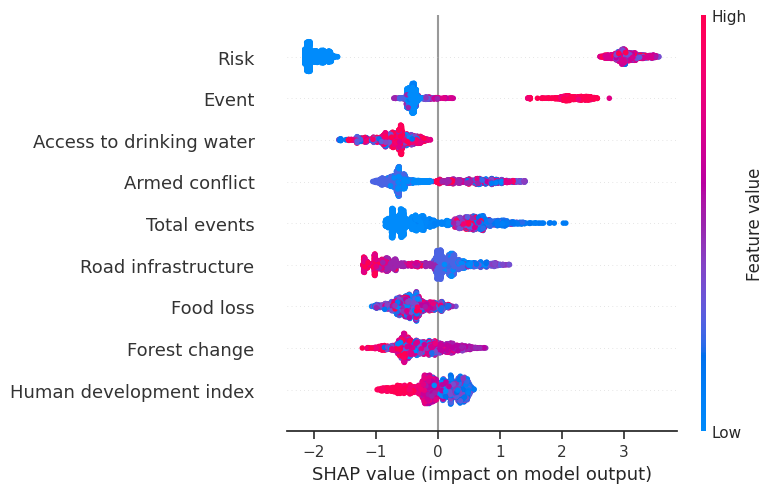

In [ ]:
shap.summary_plot(explanation, X)

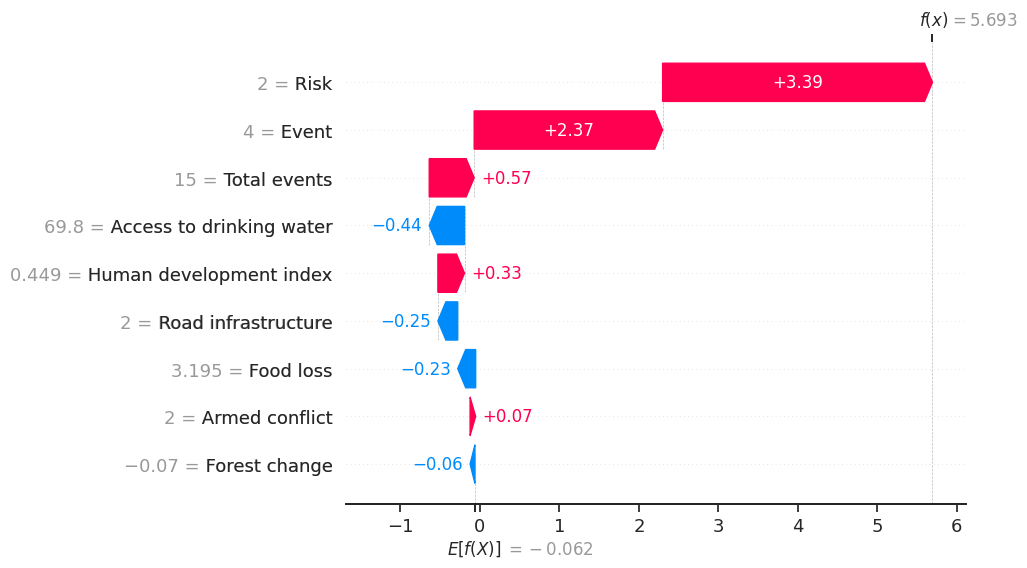

In [ ]:
# SHAP waterfall plot for the first instance in the dataset
shap.waterfall_plot(explanation[0])

In [ ]:
# Save the force plot as an HTML file
force_plot = shap.force_plot(explainer.expected_value, explanation.values, X)
shap.save_html('force_plot.html', force_plot)

# Now you can download the file from Colab
from google.colab import files
files.download('force_plot.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

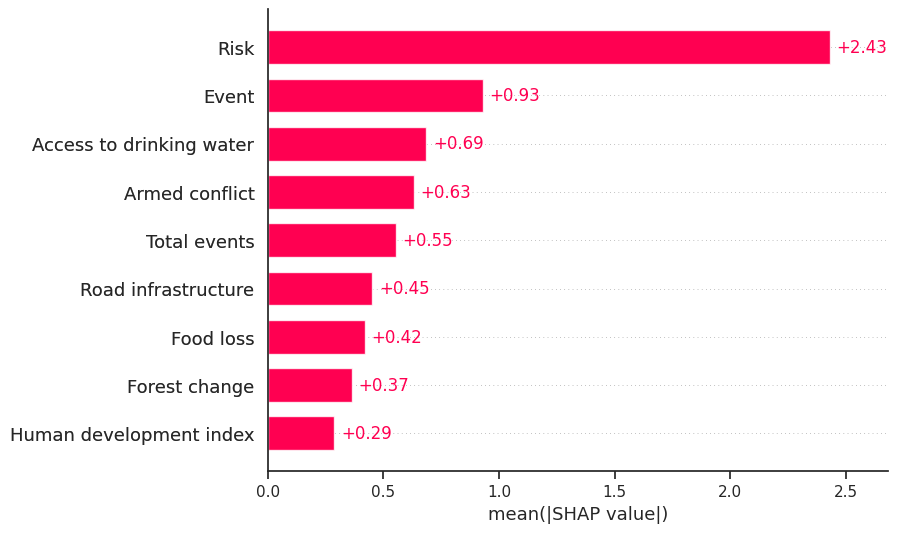

In [ ]:
# SHAP bar plot
shap.plots.bar(explanation)

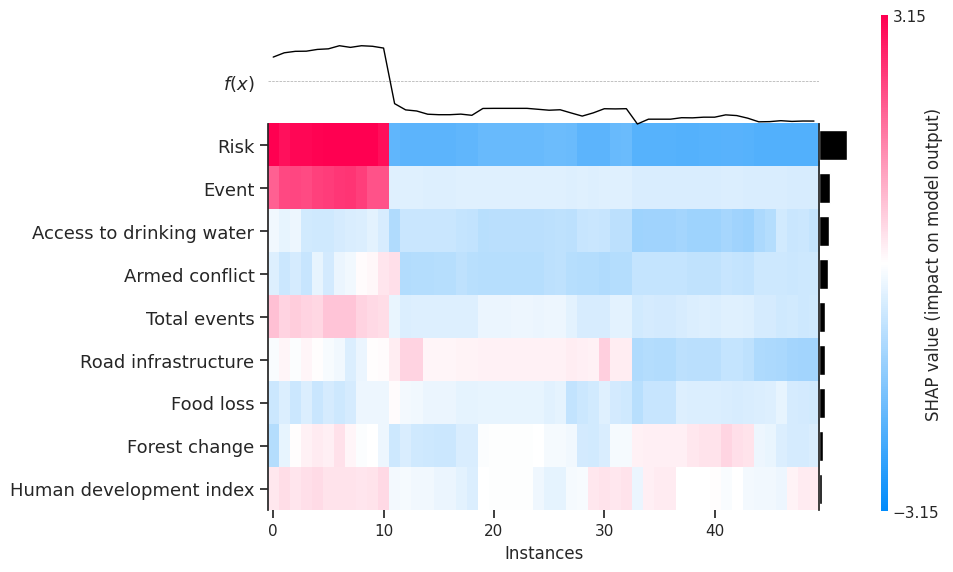

<Axes: xlabel='Instances'>

In [ ]:
# SHAP heatmap for the first 50 instances
shap.plots.heatmap(explanation[:50])